# Project 2 - Nortwind Dataset 

The goal of this project is to do statistical analysis and hypothesis testing to generate valuable analytical insights for the company. I will be working on Nortwind Databaset.

# Methodology

I followed scientific method for hypothesis testing. I also used  Exploratory Data Analysis (EDA) approach to do the  statistical analysis  within the hypothesis testing process. 





 <img src='new_the-scientific-method.png' width="500" height="700">


The general structure of an experiment is as follows:


#### 1. Make an Observation and Come up with the Question
The first step of the scientific method is to observe something that you want to test. During this step, you must observe phenomena to help refine the question that you want to answer. 
#### 2. Examine the Data 
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. The main pillars of EDA are data cleaning, data preparation, data exploration, and data visualization. 

The particular graphical techniques employed in EDA are often quite simple, consisting of various techniques of:

* Plotting the raw data (such as data traces, histograms, bihistograms, probability plots, lag plots, block plots, and Youden plots.

* Plotting simple statistics such as mean plots, standard deviation plots, box plots, and main effects plots of the raw data.

* Positioning such plots so as to maximize our natural pattern-recognition abilities, such as using multiple plots per page.

#### 3. Form a Hypothesis
During this stage, you'll formulate 2 hypotheses to test--your educated guess about the outcome is called the Alternative Hypothesis, while the opposite of it is called the Null Hypothesis. 

#### 4. Run the Test
This step is the part of the scientific method that will be the focus of this section. You can only test a hypothesis by gathering data from a well-structured experiment.You must pick the right test for you case. Moreover, each staistical test has a set of assumptions to be considered accurate. Make sure those assumptions are met and run the test. 

#### 5. Analyze Experimental Results
During this step, you will tease out relationships, filter out noise, and try to determine if something that happened is statistically significant or not. Depend on the test result, you will compare t, f,z, mostly p value with the alpha value to come up with conclusions. 

#### 6. Draw Conclusions
This step is the logical endpoint for an experiment. You've asked a question, looked at experimental results from others that could be related to your question, made an educated guess, designed an experiment, collected data and analyzed the results. 
The reality of this step is that you use your analysis of the data to do one of two things: either reject the null hypothesis or fail to reject the null hypothesis. 




### Northwind Dataset Schema 

# <img src='Northwind_ERD.png'>


## The Order of Hyphotesis Testing:
* Question
* Get the Data
* EDA 
* Write null Hypothesis and alternative Hypothesis
* Decide the test and Alpha level
* Compute the test statistics
* Analyze the result




In [1741]:
import sqlalchemy
import pandas as pd
import numpy as np
from scipy import stats
from sqlalchemy import create_engine
from sqlalchemy import inspect

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from scipy import stats # significance levels, normality
import itertools # for combinations
import statsmodels.api as sm # anova
from statsmodels.formula.api import ols


In [1742]:
# connecting to the Database using SQLAlchemy
engine = create_engine("sqlite:///Northwind_small.sqlite")

# create an inspector object
inspector = inspect(engine)

# get names of tables in database
print(inspector.get_table_names())

['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [1743]:
# write a quick function that prints the columns of a table and each column's type

def get_columns_info(table_name):    
    """ Function takes in table name and prints columns' names
    and datatypes """
    
    cols_list = inspector.get_columns(table_name)    
    print(f"Table Name: {table_name}\n")
    for col in cols_list:
        print(f"Name: {col['name']} \t Type: {col['type']}")

In [1744]:
# calling the function to test it
get_columns_info('OrderDetail')

Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


In [1745]:
get_columns_info('Product')

Table Name: Product

Name: Id 	 Type: INTEGER
Name: ProductName 	 Type: VARCHAR(8000)
Name: SupplierId 	 Type: INTEGER
Name: CategoryId 	 Type: INTEGER
Name: QuantityPerUnit 	 Type: VARCHAR(8000)
Name: UnitPrice 	 Type: DECIMAL
Name: UnitsInStock 	 Type: INTEGER
Name: UnitsOnOrder 	 Type: INTEGER
Name: ReorderLevel 	 Type: INTEGER
Name: Discontinued 	 Type: INTEGER


In [1746]:
OrderDetails = pd.read_sql_query('''SELECT *
                            FROM OrderDetail
                            LIMIT 5
                            ;''', engine)
OrderDetails

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [1747]:
category = pd.read_sql_query('''SELECT *
                            FROM category
                
                            ;''', engine)
category

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [1748]:
get_columns_info('Order')

Table Name: Order

Name: Id 	 Type: INTEGER
Name: CustomerId 	 Type: VARCHAR(8000)
Name: EmployeeId 	 Type: INTEGER
Name: OrderDate 	 Type: VARCHAR(8000)
Name: RequiredDate 	 Type: VARCHAR(8000)
Name: ShippedDate 	 Type: VARCHAR(8000)
Name: ShipVia 	 Type: INTEGER
Name: Freight 	 Type: DECIMAL
Name: ShipName 	 Type: VARCHAR(8000)
Name: ShipAddress 	 Type: VARCHAR(8000)
Name: ShipCity 	 Type: VARCHAR(8000)
Name: ShipRegion 	 Type: VARCHAR(8000)
Name: ShipPostalCode 	 Type: VARCHAR(8000)
Name: ShipCountry 	 Type: VARCHAR(8000)


First I need the data from the orderdetail table. Just to see the data on those table I will query the top 5 rows. 

In [1749]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


### I will only query the data parts that I will use as a good practice of reducing the load for the processor. Since SQL is a lot faster than Pyhton in data processing so I will also filter and extracting in SQL query as much as I can. 

# Question 1
### 1.1 - Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?


### 1.2 - Retrieve the data and perform EDA

Out of all the columns, I will only need Quantity and Discount columns from Orderdetails table.  

In [1750]:
data = pd.read_sql_query('''SELECT Discount, Quantity
                            FROM OrderDetail
                            
                            ;''', engine)
data.head()

,Discount,Quantity
0,0.0,12
1,0.0,10
2,0.0,5
3,0.0,9
4,0.0,40


I want those columns to be grouped by and ordered by Discount levels. 

In [1751]:
discount_levels = pd.read_sql_query('''SELECT Discount, sum(Quantity) as Quantity
                            FROM OrderDetail
                            GROUP BY Discount
                            ORDER BY Discount
        
                            ;''', engine)
discount_levels
            
         

,Discount,Quantity
0,0.00,28599
1,0.01,2
2,0.02,4
3,0.03,5
4,0.04,1
5,0.05,5182
6,0.06,2
7,0.10,4366
8,0.15,4456
9,0.20,4351


Most orders do not have discount. Discount levels are mainly 5%, 10%, 15%, 20%, 25%. There are a few rare cases though. 

To see how the data distributed, I will create bar graph. 

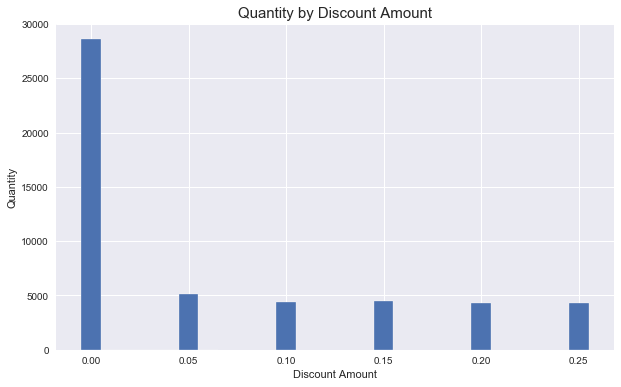

In [1752]:
plt.figure(figsize=(10,6))
plt.bar(discount_levels.Discount,discount_levels.Quantity, width=0.01) 
plt.title('Quantity by Discount Amount', size=15)
plt.xlabel("Discount Amount")
plt.ylabel("Quantity")
plt.show()



Rare discounts are ignored in the chart, I will also ignore them in the test. 
I will split this data in to two samples as discount and non-discount orders. I will not include the extreme rare discount levels this time. 

In [1753]:
non_disc = pd.read_sql_query('''SELECT Discount, Quantity
                            FROM OrderDetail
                            WHERE Discount=0
                            
                            ;''', engine)


disc = pd.read_sql_query('''SELECT Discount, Quantity
                                            FROM OrderDetail
                                            WHERE Discount >= 0.1 OR Discount = 0.05 
                            
                            ;''', engine)

In [1754]:
non_disc.describe()

,Discount,Quantity
count,1317.0,1317.000000
mean,0.0,21.715262
std,0.0,17.507493
min,0.0,1.000000
25%,0.0,10.000000
50%,0.0,18.000000
75%,0.0,30.000000
max,0.0,130.000000


In [1755]:
disc.describe()

,Discount,Quantity
count,830.000000,830.000000
mean,0.145542,27.354217
std,0.071250,20.720667
min,0.050000,1.000000
25%,0.100000,12.250000
50%,0.150000,20.000000
75%,0.200000,36.000000
max,0.250000,130.000000


It is always a good idea to draw the probability distributions for samples to visually inspect the differences present between mean and standard deviation.I will plot both samples' distributions and inspect the overlap using seaborn to get an idea how different the samples might be from one another.

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


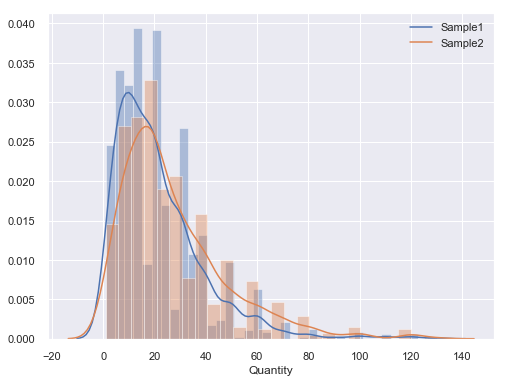

In [1756]:
def dist_charts(sample1,sample2):
    
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(8,6)})
    sns.distplot(sample1,  kde_kws={"label": "Sample1"})
    sns.distplot(sample2, kde_kws={"label": "Sample2"}) 
    
dist_charts(non_disc.Quantity,disc.Quantity)

**This question needs two steps.** First I need to verify if there is a statisticaly significant difference between the orders have discount and the orders have not discount. Only if there is a significant difference, I would determine the effect of different levels of discounts. 

Let's do the first part. 


### 1.3 Hypothesis


$H_0$: Offering discount does not affect the average number of product in an order.

 $H_0: \mu_1 = \mu_2$     

$H_1$: Offering discount affects the average number of product in an order.

 $H_0: \mu_i \neq \mu_j$

##### I set my significance level (Alpha): 0.05

 **$\alpha$ = 0.05**

### 1.4 Statistical Analysis

Welch’s t-test is a nonparametric univariate test that tests for a significant difference between the mean of two unrelated groups. It is an alternative to the independent t-test when there is a violation in the assumption of equality of variances. In our case we have slighly different variences so I will use Welch's t-test. With this close standart deviation, probably, Student's t-test would also be ok but let's go by Welch's t-test beacuse, it is also best for the categorical indipendant variables. 

#### Welch’s t-test Assumptions
Like every test, this inferential statistic test has assumptions. The assumptions that the data must meet in order for the test results to be valid are:

* The independent variable (IV) is categorical with at least two levels (groups) 
  **Check**   Discount column has categorical data. 
* The dependent variable (DV) is continuous which is measured on an interval or ratio scale;  **Check**  Quantity column has continues data. 
* The distribution of the two groups should follow the normal distribution; We can check the normality of a distribution with a few different method such KS Test or Shapiro Test. The first thing we need to do is import scipy.stats as stats and then test our assumptions. We can test the assumption of normality using the stats.shapiro(). The first value in the tuple is the W test statistic, and the second value is the p-value.



#### Normality Check

In [1757]:
stats.shapiro(disc.Quantity)

(0.8673426508903503, 6.471277454941499e-26)

In [1758]:
stats.shapiro(non_disc.Quantity)

(0.8434571027755737, 3.803856556577728e-34)

In [1759]:
#KS Test for normality
stats.kstest(non_disc.Quantity, 'norm', args=(0,2))


KstestResult(statistic=0.9187836569660197, pvalue=0.0)

p_value is very small for both tests, so we can not say that the distribution is normal however when the sample size is sufficiently large, Welch's t-test can still perform well.

#### Performing Welch's t-test

In [1760]:
from scipy import stats

stats.ttest_ind(disc.Quantity, non_disc.Quantity, equal_var=True)


Ttest_indResult(statistic=6.7627297036707565, pvalue=1.7401995278127614e-11)

P _value is very small (1.7401995278127614e-11), it is safe to **reject the null hypothesis suggesting the alternative**. We can say that the discount has a **statistically significant** effect on the quantity average of the product in an order. But we do not know how much of a difference it makes. To figure that out, let's check the **effect size**. 


#### Effect Size

In [1761]:
Cohen_d(disc.Quantity,non_disc.Quantity)

0.2997078720940889

Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. Eventhough we did the two tailed test (equla or not equal check), we can say that the impact is pozitive by looking at the effect size. Since it is positive, discounts resulted increased quantity in orders. 

Having 0.28 means that if two groups' means differ by 0.28 standard deviations the **effect is small** but, still statistically signficant.

#### The second part of  question is in what level the discount make significant difference in the order quantity

I will check the effect sizes for all different discount values in a simple loop.

In [1762]:

discount_levels=[0.05,0.1,0.15,0.20,0.25]
effect_sizes_on_quantity= []
#effect_sizes['Discount']= discount_levels
for i in discount_levels:
    sample=disc.loc[disc['Discount']==i]['Quantity']
    effect_sizes_on_quantity.append(round ( Cohen_d(sample, non_disc.Quantity),3))
    print('Effect Size for',i, 'Discount :', round ( Cohen_d(sample, non_disc.Quantity),3))



Effect Size for 0.05 Discount : 0.347
Effect Size for 0.1 Discount : 0.196
Effect Size for 0.15 Discount : 0.372
Effect Size for 0.2 Discount : 0.301
Effect Size for 0.25 Discount : 0.367


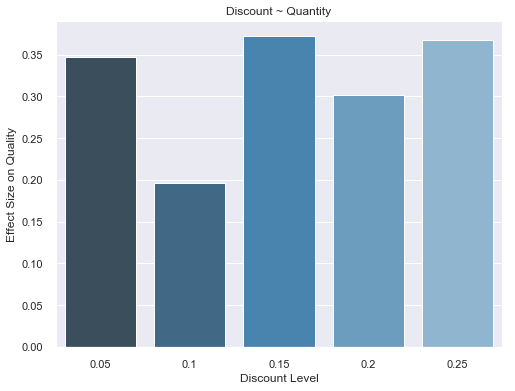

In [1763]:
#sns.set(style="whitegrid")

ax = sns.barplot(x=discount_levels, y=effect_sizes_on_quantity, palette="Blues_d", )
ax.set(xlabel='Discount Level', ylabel='Effect Size on Quality', title= "Discount ~ Quantity")

plt.show()

Results show that, 15% of discount has the most impact on the quantity of a product in an order. The least impact is belong to 10%.

### 1.5 - Conclusion

* Offering discount increases the quantity of a product in an order.
* Although the difference between discount and non-discount order quantities is statistically significant, the effect size is still small.It is 0.299 where between 2-5 is considered small.   So it does not make tremendous increase of the total number.
* There are 5 main discount level the company offers such as 5%,10%,15%,20%,25%. Among them **the most impactfull one us 15% discount**. On the other hand, 10% has the smallest impact. 

### 1.6 - Further Research

* The reason for getting less impact while offering more discounts (10%, 20%) needs to be investigated
* The effect size is small on the number of the orders however, we did not test how it effects the overall profit. So another round of tests could be run for the profit difference. 




# Question 2
### 2.1 - Does discount increase the profit? If so in what level it allows best profit? 
### 2.2 - Retrieve the data and perform EDA


I need the profit amount for each product to test.  Lets check if there is such information in product and orderdetail tables. 


In [1764]:
product = pd.read_sql_query('''SELECT *
                            FROM Product
                            LIMIT 5
                            ;''', engine)
product

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [1765]:
product = pd.read_sql_query('''SELECT *
                            FROM OrderDetail
                            LIMIT 4
                            ;''', engine)
product

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0


**To be able to calculate the profit, I need to know the buy and the sale prices of each product**. In the entire dataset,  there is no mention to buy or sell price distinction. However, there are two UnitPrice value available in both OrderDetail and Product tables. But they are not the same number. In fact in the product table, most of the unit prices are more expensive then ones in the OrderDetail table. Another insight is, QuantityPerUnit is in Product table is for bulk amounts such as 10 boxes of 20 bags or 50 bags x 30 sausgs. Most probably the unit price for these bulk amounts are the price that company pays to suppliers. And the unit price in the OrderDetail is the company's sale price for one unit in that bulk. So in that case,  10 boxes x 20 bags of Chai are bought for 18.00 dolars from the supplier and 1 box of 20 bags of Chai is sold for 14.00 dolars to the end customer. That makes perfect sense. 

So, to be able calculate the profit, I need to do a little feature engineering and math here. First I need to **extract the Quantity of units from the Quantityperunit column which is a string value. I checked the entire column, it seems consistent that the number of units are the first number in the string until the space. So I will use .split() method to get that number and convert to integer and store in another column.** Let's get started.

In [1766]:
product_order = pd.read_sql_query('''
                                SELECT  p.Id,p.ProductName, p.QuantityPerUnit, p.UnitPrice as BulkPrice, 
                                        o.Unitprice as UnitSalePrice, o.Quantity QuantityInOrder, o.Discount

                                FROM Product p
                                JOIN OrderDetail o ON ProductId
                               
                        
                                ;''', engine)
product_order.head()


,Id,ProductName,QuantityPerUnit,BulkPrice,UnitSalePrice,QuantityInOrder,Discount
0,1,Chai,10 boxes x 20 bags,18.00,14.0,12,0.0
1,2,Chang,24 - 12 oz bottles,19.00,14.0,12,0.0
2,3,Aniseed Syrup,12 - 550 ml bottles,10.00,14.0,12,0.0
3,4,Chef Anton's Cajun Seasoning,48 - 6 oz jars,22.00,14.0,12,0.0
4,5,Chef Anton's Gumbo Mix,36 boxes,21.35,14.0,12,0.0


In [1767]:

int(product_order.QuantityPerUnit[0].split()[0])

10

#### Extracting the number of units in a bulk

The number of units are the first number in the string until the space however, there was one exception that caused error. I spotted that and add an if statement to catch it an convert it to a number manually.

In [1768]:
quantityinbulk=[]
for i in range(len(product_order.QuantityPerUnit)):
        n=product_order.QuantityPerUnit[i].split()[0]
        if n =='1k':
            n=1000
        quantityinbulk.append(int(n))
   

In [1769]:
     
product_order['QuantityInBulk']= quantityinbulk

In [1770]:
product_order['QuantityInBulk'].head()

0    10
1    24
2    12
3    48
4    36
Name: QuantityInBulk, dtype: int64

In [1771]:
product_order.head()


,Id,ProductName,QuantityPerUnit,BulkPrice,UnitSalePrice,QuantityInOrder,Discount,QuantityInBulk
0,1,Chai,10 boxes x 20 bags,18.00,14.0,12,0.0,10
1,2,Chang,24 - 12 oz bottles,19.00,14.0,12,0.0,24
2,3,Aniseed Syrup,12 - 550 ml bottles,10.00,14.0,12,0.0,12
3,4,Chef Anton's Cajun Seasoning,48 - 6 oz jars,22.00,14.0,12,0.0,48
4,5,Chef Anton's Gumbo Mix,36 boxes,21.35,14.0,12,0.0,36


Now I will calculate the price per unit in the bulk and the sale price per unit including discount. Create two extra column for total revenue and the total profit in an order

In [1772]:
product_order['UnitCost']=round(( product_order.BulkPrice / product_order.QuantityInBulk),1)

In [1773]:
product_order['Revenue']= round ((product_order.UnitSalePrice *product_order.QuantityInOrder),1)

In [1774]:
product_order['Profit']= round((product_order.UnitSalePrice-product_order['UnitCost'])* product_order.QuantityInOrder*(1- product_order.Discount),1)

In [1775]:
product_order.head()

,Id,ProductName,QuantityPerUnit,BulkPrice,UnitSalePrice,QuantityInOrder,Discount,QuantityInBulk,UnitCost,Revenue,Profit
0,1,Chai,10 boxes x 20 bags,18.00,14.0,12,0.0,10,1.8,168.0,146.4
1,2,Chang,24 - 12 oz bottles,19.00,14.0,12,0.0,24,0.8,168.0,158.4
2,3,Aniseed Syrup,12 - 550 ml bottles,10.00,14.0,12,0.0,12,0.8,168.0,158.4
3,4,Chef Anton's Cajun Seasoning,48 - 6 oz jars,22.00,14.0,12,0.0,48,0.5,168.0,162.0
4,5,Chef Anton's Gumbo Mix,36 boxes,21.35,14.0,12,0.0,36,0.6,168.0,160.8


In [1776]:
#Let's see how much the total profit the entire orders. 
product_order['Profit'].sum()

90069998.0

90 million dolars is not that bad. I want to explore this new data a bit, if it looks realistic. 

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


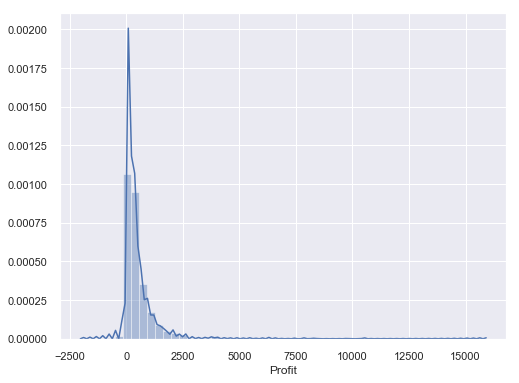

In [1777]:
sns.distplot(product_order['Profit'])

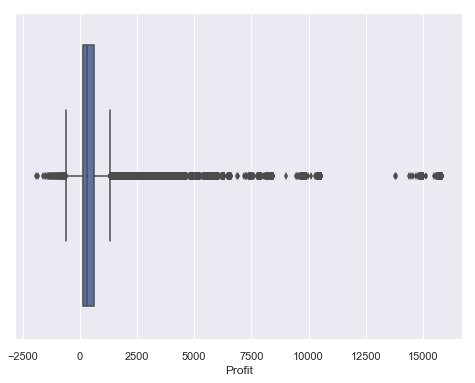

In [1778]:
sns.boxplot(product_order['Profit'])

In [1779]:
#There are quite a bit outliers in this data. I will explore a bit more. 

product_order[product_order['Profit']>10000]['Profit'].sum()

3916852.8

In [1780]:

product_order[product_order['Profit']<=10000]['Profit'].sum()

86153145.2

In [1781]:
product_order['Profit'].describe()

count    165935.000000
mean        542.802893
std         957.622349
min       -1925.000000
25%         120.000000
50%         297.000000
75%         608.000000
max       15810.000000
Name: Profit, dtype: float64

In [1782]:
product_order[product_order['Profit']<0]['Discount'].value_counts()

0.00    2206
0.05     317
0.20     276
0.10     276
0.15     266
0.25     224
0.01       2
0.03       2
0.02       2
Name: Discount, dtype: int64

Well, there are soo many items are sold with negative profit. But it seems like company still makes a good amunt of money. They probably keep selling those items to keep the customers happy and make profit out of other products that they sell them.

In [1783]:
non_disc2 = product_order[product_order['Discount'] == 0]
disc2 = product_order[(product_order['Discount'] >= 0.1) | (product_order['Discount'] == 0.05 ) ]
disc2.head()

,Id,ProductName,QuantityPerUnit,BulkPrice,UnitSalePrice,QuantityInOrder,Discount,QuantityInBulk,UnitCost,Revenue,Profit
462,1,Chai,10 boxes x 20 bags,18.00,42.4,35,0.15,10,1.8,1484.0,1207.8
463,2,Chang,24 - 12 oz bottles,19.00,42.4,35,0.15,24,0.8,1484.0,1237.6
464,3,Aniseed Syrup,12 - 550 ml bottles,10.00,42.4,35,0.15,12,0.8,1484.0,1237.6
465,4,Chef Anton's Cajun Seasoning,48 - 6 oz jars,22.00,42.4,35,0.15,48,0.5,1484.0,1246.5
466,5,Chef Anton's Gumbo Mix,36 boxes,21.35,42.4,35,0.15,36,0.6,1484.0,1243.6


/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


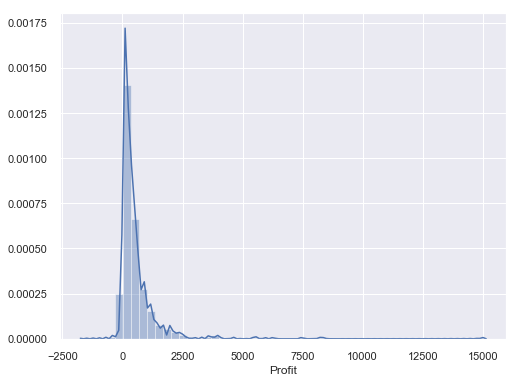

In [1784]:
sns.distplot(disc2['Profit'])


/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


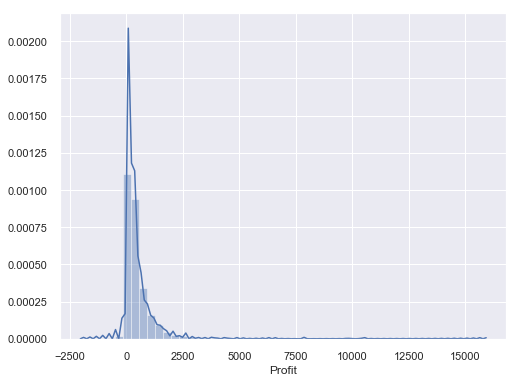

In [1785]:
sns.distplot(non_disc2['Profit'])

I have all the data I need. Now it is time built hypothesis.  

### 2.3 Hypothesis


$H_0$: Offering discount does not affect the average profit in an order.

 $H_0: \mu_1 = \mu_2$     

$H_1$: Offering discount affects the average profit in an order.

 $H_0: \mu_i \neq \mu_j$

##### I set my significance level (Alpha): 0.05

 **$\alpha$ = 0.05**

### 2.4 Statistical Analysis

Welch’s t-test is a nonparametric univariate test that tests for a significant difference between the mean of two unrelated groups. It is an alternative to the independent t-test when there is a violation in the assumption of equality of variances. In our case we have slighly different variences so I will use Welch's t-test. With this close standart deviation, probably, Student's t-test would also be ok but let's go by Welch's t-test beacuse, it is also best for the categorical indipendant variables. 

#### Welch’s t-test Assumptions
Like every test, this inferential statistic test has assumptions. The assumptions that the data must meet in order for the test results to be valid are:

* The independent variable (IV) is categorical with at least two levels (groups) 
  **Check**   Discount column has categorical data. 
* The dependent variable (DV) is continuous which is measured on an interval or ratio scale;  **Check**  Quantity column has continues data. 
* The distribution of the two groups should follow the normal distribution; We can check the normality of a distribution with a few different method such KS Test or Shapiro Test. The first thing we need to do is import scipy.stats as stats and then test our assumptions. We can test the assumption of normality using the stats.shapiro(). The first value in the tuple is the W test statistic, and the second value is the p-value.



#### Normality Check

In [1786]:
#KS Test for normality
stats.kstest(disc2.Profit, 'norm', args=(0,2))

KstestResult(statistic=0.9748728263110751, pvalue=0.0)

In [1787]:
#KS Test for normality
stats.kstest(non_disc2.Profit, 'norm', args=(0,2))


KstestResult(statistic=0.9739966364165978, pvalue=0.0)

p_value is very small for both tests, so we can not say that the distribution is normal however when the sample size is sufficiently large, Welch's t-test can still perform well.

#### Performing Welch's t-test

In [1788]:
from scipy import stats

stats.ttest_ind(disc2.Profit, non_disc2.Profit, equal_var=True)


Ttest_indResult(statistic=9.68427386675722, pvalue=3.565068297046637e-22)

P _value is very small (.694551724324254e-16), it is safe to **reject the null hypothesis suggesting the alternative**. We can say that the discount has a **statistically significant** effect on the **average profit** of the product in an order. But we do not know how much of a difference it makes. To figure that out, let's check the **effect size**. 


#### Effect Size

In [1789]:
Cohen_d(disc2.Profit, non_disc2.Profit)

0.04891091343053319

Cohen suggested that d=0.2 be considered a 'small' effect size. In our case, the effect size is very small. We can still say that the impact is positive and discounts, all togather, resulted increased the average profit in orders. 

#### The second part of  question is in what level the discount make significant difference in the order quantity

I will check the effect sizes for all different discount values in a simple loop.

In [1790]:
discount_levels=[0.05,0.1,0.15,0.20,0.25]
effect_sizes_on_profit=[]
for i in discount_levels:
    sample=disc2.loc[disc2['Discount']==i]['Profit']
    effect_sizes_on_profit.append(round ( Cohen_d(sample, non_disc2.Profit),3))
    print('Effect Size for',i, 'Discount on Profit:', round ( Cohen_d(sample, non_disc2.Profit),3))


Effect Size for 0.05 Discount on Profit: 0.214
Effect Size for 0.1 Discount on Profit: -0.047
Effect Size for 0.15 Discount on Profit: -0.019
Effect Size for 0.2 Discount on Profit: -0.017
Effect Size for 0.25 Discount on Profit: 0.077


Effect Size for 0.05 Discount : 0.347
Effect Size for 0.1 Discount : 0.196
Effect Size for 0.15 Discount : 0.372
Effect Size for 0.2 Discount : 0.301
Effect Size for 0.25 Discount : 0.367

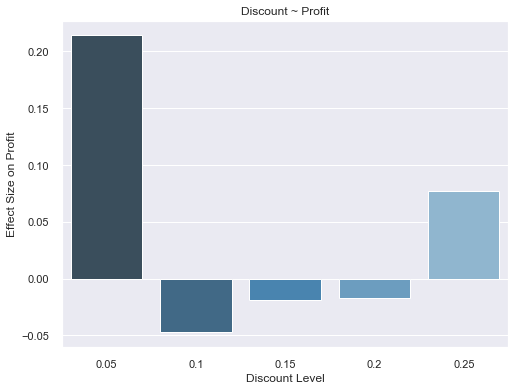

In [1898]:

ax= sns.barplot(x=discount_levels, y=effect_sizes_on_profit, palette="Blues_d", )
ax.set(xlabel='Discount Level', ylabel='Effect Size on Profit', title= "Discount ~ Profit")

plt.show()

In [1792]:

product_order[product_order['Discount']==0]['Profit'].mean()

526.5478448658434

In [1793]:
product_order[product_order['Discount']>0]['Profit'].mean()

568.3493103555223

In [1794]:
discount_levels_0=[0,0.05,0.1,0.15,0.20,0.25]
for i in discount_levels:
    
    print ('Profit with' , i, 'discount:', product_order[product_order['Discount']==i]['Profit'].mean())

Profit with 0.05 discount: 744.6751632151625
Profit with 0.1 discount: 483.44072517078433
Profit with 0.15 discount: 509.08277773182385
Profit with 0.2 discount: 510.65190771960795
Profit with 0.25 discount: 600.0697841119863


Results show that, 5% of discount has the most impact on the profir of a product in an order. The least impact is belong to 10%. In fact, 10%, 15% and 20% makes negatif impact on the profit. However, it does not mean that the company loosing money. As long as the effect size is bigger that -1, it still a profit but less then they would make without the discount. There could be many aspects of this strategy. Marketting, stocking, reagon, customer oriented sales, etc.. 

## 2.5 - Conclusion

* Offering discount increases the average profit in an order.
* Although the difference between discount and non-discount profit is statistically significant, the effect size is surprising.5% of discount has the most impact on the profit of a product in an order. The least impact belongs to 10%. In fact, 10%, 15% and 20% makes negatif impact on the profit.
* Eventhough 15% ,20% could be small negative effect, 10% discount drops the average profit significantly.It increases the average quantity in an order small amount, however, it has medium negative effect on the average profit. Company should consider %10 discount carefully.  
* Although some level of disconts causes less profit to the company, overall discounts increases the average profit in an order from 526 Dolars to 560 Dolars. 

## 2.6 - Further Research

 * The effect size is small on the number of the orders however, we did not test how it effects the overall profit. So another round of tests could be run for the profit difference. 
 * There care many aspects of the discount strategy. Marketting, stocking, reagon, customer oriented sales, etc.. To improve the effectiveness of discounts, individual products (price, demand and offer by the reagon) and sale patterns can be studied. Clearly more expensive product could be more impactfull even if they are sold in small quantities. 



# Question 3
### 3.1 - Does the employee's generation effect the average quantity of products sold? 
### 3.2 - Retrieve the data and perform EDA

In [1796]:
# calling the function to test it
get_columns_info('Order')

Table Name: Order

Name: Id 	 Type: INTEGER
Name: CustomerId 	 Type: VARCHAR(8000)
Name: EmployeeId 	 Type: INTEGER
Name: OrderDate 	 Type: VARCHAR(8000)
Name: RequiredDate 	 Type: VARCHAR(8000)
Name: ShippedDate 	 Type: VARCHAR(8000)
Name: ShipVia 	 Type: INTEGER
Name: Freight 	 Type: DECIMAL
Name: ShipName 	 Type: VARCHAR(8000)
Name: ShipAddress 	 Type: VARCHAR(8000)
Name: ShipCity 	 Type: VARCHAR(8000)
Name: ShipRegion 	 Type: VARCHAR(8000)
Name: ShipPostalCode 	 Type: VARCHAR(8000)
Name: ShipCountry 	 Type: VARCHAR(8000)


In [1797]:
# calling the function to test it
get_columns_info('OrderDetail')

Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


In [1798]:
birthday= pd.read_sql_query('''SELECT  e.Id, e.BirthDate, o.Id as OrderId, od.Quantity
                              FROM Employee e
                              JOIN [Order] o ON e.Id = o.EmployeeId
                              JOIN Orderdetail od ON  o.Id = od.OrderId
                                                 
                            ;''', engine)
birthday.head()

,Id,BirthDate,OrderId,Quantity
0,5,1987-03-04,10248,12
1,5,1987-03-04,10248,10
2,5,1987-03-04,10248,5
3,6,1995-07-02,10249,9
4,6,1995-07-02,10249,40


In [1799]:
# Birth year should be extracted from the BirthDate column. It is a varchar type so I can use split.
birth_year=[]
for i in range(len(birthday.BirthDate)):
        birth_year.append(int(birthday.BirthDate[i].split('-', 1)[0]))
        
np.unique(birth_year)

array([1969, 1980, 1984, 1987, 1990, 1992, 1995, 1998])

I can use this list as it is, because it seems just a few unique years. However, I would like to see the impact of generations so I will convert this data into generation groups. 

In [1928]:
#labeling generations
"""
The Silent Generation: Born 1928-1945 (73-90 years old)
Baby Boomers: Born 1946-1964 (54-72 years old)
Generation X: Born 1965-1980 (38-53 years old)
Millennials: Born 1981-1996 (22-37 years old)
Post-Millennials: Born 1997-Present (0-21 years old)
"""
generations=[]
for n,i in enumerate (birth_year):
    #print (i, n)
    if i<=1945:
        generations.append('Silent')
    elif i>=1946 and i<=1964:
        generations.append('Boomer')
    elif i>=1965 and i<=1980:
        generations.append('Gen_x')
    elif i>=1981 and i<=1996:
        generations.append('Millennial')
    else :
        generations.append('Gen_z')


In [1929]:
# Adding the Generation column to the dataframe.
birthday['Generation']=generations

In [1930]:
birthday['Generation'].value_counts()

Millennial    1283
Gen_x          765
Gen_z          107
Name: Generation, dtype: int64

In [1941]:
birthday['Generation'].describe()

count           2155
unique             3
top       Millennial
freq            1283
Name: Generation, dtype: object

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


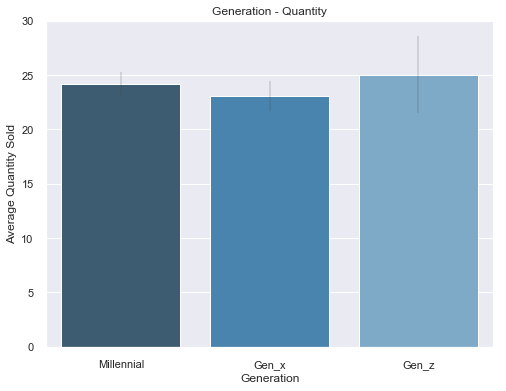

In [1931]:
birthday.groupby('Generation')['Quantity'].mean()
ax= sns.barplot(x=birthday.Generation, y=birthday.Quantity, palette="Blues_d", errwidth=0.3
                ,)
ax.set(xlabel='Generation', ylabel='Average Quantity Sold', title= "Generation - Quantity" )

plt.show()


In [1932]:
birthday.groupby('Generation').sum()

,Id,OrderId,Quantity
Generation,,,
Gen_x,2025,8144378,17610
Gen_z,963,1145701,2670
Millennial,6350,13680876,31037


No Silent!,not surprising. So, we have 3 generation groups that we need for the testing.

### 3.3 Hypothesis


$H_0$: Employee's generation does not have impact on the number of products sold.

 $H_0: \mu_1 = \mu_2 = \mu_3= \mu_4...= \mu_i= \mu_j$   

$H_1$: Employee's generation has impact on the number of products sold.

 $H_0: \mu_i \neq \mu_j$

##### I set my significance level (Alpha): 0.05

 **$\alpha$ = 0.05**

### 3.4 Statistical Analysis

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other. If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other. So ANOVA would be good for this situation. 

#### ANOVA Assumptions

* Each group sample is drawn from a normally distributed population
* All populations have a common variance
* All samples are drawn independently of each other
* Within each sample, the observations are sampled randomly and independently of each other
* Factor effects are additive

The presence of outliers can also cause problems. In addition, we need to make sure that the F statistic is well behaved. In particular, the F statistic is relatively robust to violations of normality provided:

* The populations are symmetrical and uni-modal.
* The sample sizes for the groups are equal and greater than 10

In general, as long as the sample sizes are equal (called a balanced model) and sufficiently large, the normality assumption can be violated provided the samples are symmetrical or at least similar in shape (e.g. all are negatively skewed).


#### Normality Check

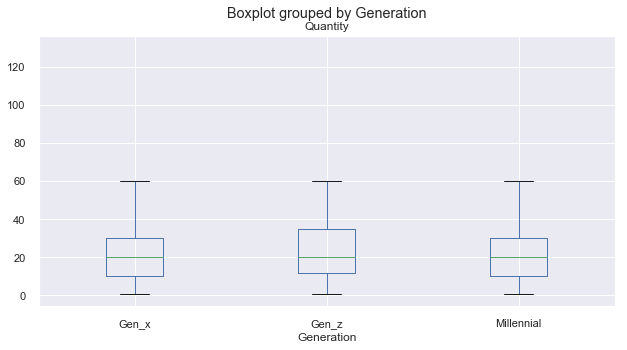

In [1933]:
birthday.boxplot('Quantity','Generation', figsize=(10, 5));

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


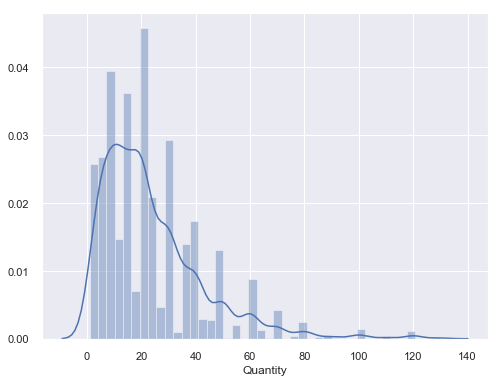

In [1934]:
sns.distplot(birthday['Quantity'])

In [1935]:
stats.kstest(birthday['Quantity'], 'norm', args=(0,2))

KstestResult(statistic=0.9238855989102894, pvalue=0.0)

p_value is 0, so we can not say that the distribution is normal however when the sample size is sufficiently large, Anova can still perform well. 



In [1936]:
#birthday=birthday[birthday['Quantity']<90]

#### Equal Variances Check

In [1939]:
# using Levene’s test to test for equal variances between groups
stats.levene(birthday['Quantity'][birthday['Generation'] == "Millennial"],
             birthday['Quantity'][birthday['Generation'] == "Gen_z"],
             birthday['Quantity'][birthday['Generation'] == "Gen_x"])

LeveneResult(statistic=0.06774940223865293, pvalue=0.9344966195919657)

Equal variances between groups assumptios is met. 

#### Performing One-way ANOVA

In [1940]:

formula = 'Quantity ~ C(Generation)'
lm = ols(formula, birthday).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq      df         F    PR(>F)
C(Generation)     803.948837     2.0  1.111037  0.329406
Residual       778595.687358  2152.0       NaN       NaN


### 3.5 - Conclusion

According to ANOVA test result, we fail to reject the null hypothesis. Employee's generation does not have impact on the number of products sold. So, there is no statistically significant difference between performences of generations. It is a good sign that the company sale practices works well across the ages throughout the company.   


### 3.6 - Further Research


# Question 4
### 4.1 - Does the revenue of dairy product (cheese) differs by region and the time of the years? 
### 4.2 - Retrieve the data and perform EDA

I will need from a few tables and do some feature engineering to calculate revenue. 

In [1811]:
get_columns_info('Category')

Table Name: Category

Name: Id 	 Type: INTEGER
Name: CategoryName 	 Type: VARCHAR(8000)
Name: Description 	 Type: VARCHAR(8000)


In [1812]:
data1 = pd.read_sql_query('''
                            SELECT   *
                            FROM Category
                            
                            ;''', engine)

data1

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


I will only select the dairy product for cheeses,  calculate and select the revenue, region and month of the order from data.
To be able to get the month information, I need to select the month info as a substring from the orderdate column because it is all VARCHAR format. 

In [1854]:
data = pd.read_sql_query('''
                            SELECT   
                                ((od.Quantity * od.UnitPrice)* (1-od.Discount)) as Revenue , c.Region, od.Quantity,
                                SUBSTR(o.OrderDate, 6, 2) OrderMonth 
                            FROM Product p 
                            JOIN OrderDetail od ON p.Id =od.ProductId
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Customer c ON o.CustomerId = c.Id

                            WHERE p.CategoryId=4
                            
                          
                                    
                        ;''', engine)

data.head()

,Revenue,Region,Quantity,OrderMonth
0,168.0,Western Europe,12,07
1,174.0,Western Europe,5,07
2,47.5,Western Europe,25,07
3,1088.0,Western Europe,40,07
4,200.0,South America,20,07


### 4.3 Hypothesis
 
Main effect of factor A ("Order Region"):

$H_0$: The average revenue for dairy products are equal for all regions.
$H_1$: The average revenue for dairy products are different at least for one region.

Main effect of factor B ("Order Month"):

$H_0$: The average revenue for dairy products are equal for all months of a year.
$H_1$: The average revenue for dairy products are different at least for one month of the year.

Factor A x factor B interactions:

$H_0$: There is no interaction between "Order Region" and "Order Month".
$H_1$: There is an interaction between "Order Region" and "Order Month".

##### I set my significance level (Alpha): 0.05

 **$\alpha$ = 0.05**

### 4.4 Statistical Analysis

The two-way ANOVA examines the effect of two factors (month and region) on a dependent variable – in this case revenue, and also examines whether the two factors affect each other to influence the continuous variable. 

#### ANOVA Assumptions

* Each group sample is drawn from a normally distributed population
* All populations have a common variance
* All samples are drawn independently of each other
* Within each sample, the observations are sampled randomly and independently of each other
* Factor effects are additive
* Dependent variable should be continuous 
* Independent variables should be in categorical, independent groups

The presence of outliers can also cause problems. In addition, we need to make sure that the F statistic is well behaved. In particular, the F statistic is relatively robust to violations of normality provided:

* The populations are symmetrical and uni-modal.
* The sample sizes for the groups are equal and greater than 10

In general, as long as the sample sizes are equal (called a balanced model) and sufficiently large, the normality assumption can be violated provided the samples are symmetrical or at least similar in shape (e.g. all are negatively skewed).



#### Normality Check

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


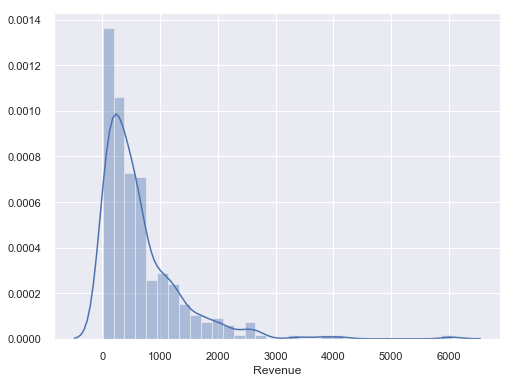

In [1855]:

sns.distplot(data.Revenue)

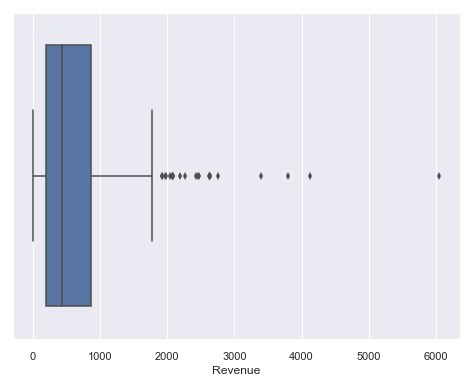

In [1865]:
sns.boxplot(data.Revenue)

In [1953]:
data=data[data.Revenue<4000]

#I removed some of the outliers in the tail. To make sure it does not harm to test accuaracy. 

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


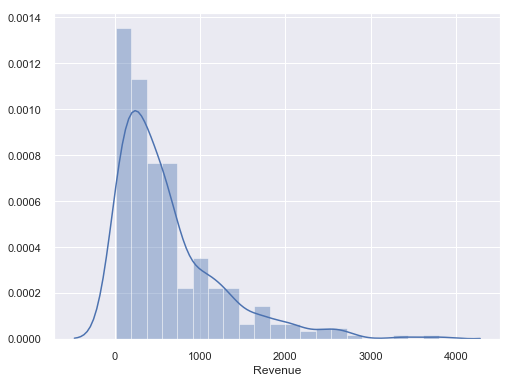

In [1954]:
sns.distplot(data.Revenue)

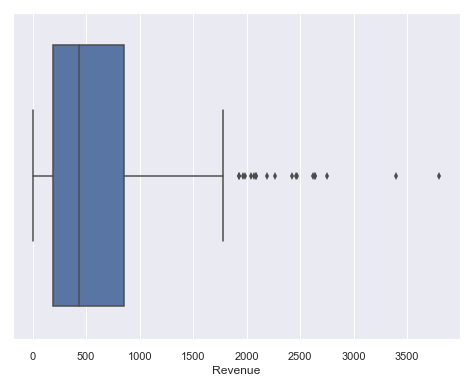

In [1955]:
sns.boxplot(data.Revenue)

In [1956]:
#KS-Test for checking normality
stats.kstest(data.Revenue, 'norm', args=(0,2))

KstestResult(statistic=0.9999893114742251, pvalue=0.0)

p_value is 0, so we can not say that the distribution is normal however when the sample size is sufficiently large, Anova can still perform well. 



In [1957]:
data.Region.unique()

array(['Western Europe', 'South America', 'Scandinavia', 'North America',
       'Southern Europe', 'Northern Europe', 'British Isles',
       'Central America', 'Eastern Europe'], dtype=object)

#### Equal Variances Check

In [1958]:

stats.levene(data['Revenue'][data['Region'] == "Western Europe"],
             data['Revenue'][data['Region'] == "South America"],
             data['Revenue'][data['Region'] == "Scandinavia"],
             data['Revenue'][data['Region'] == "North America"],
             data['Revenue'][data['Region'] == "Southern Europe"],
             data['Revenue'][data['Region'] == "Northern Europe"],
             data['Revenue'][data['Region'] == "British Isles"],
             data['Revenue'][data['Region'] == "Central America"],
             data['Revenue'][data['Region'] == "Eastern Europe"]
            )

LeveneResult(statistic=1.7172829986494036, pvalue=0.0932244407555185)

In [1959]:
stats.levene(data['Revenue'][data['OrderMonth'] == "01"],
             data['Revenue'][data['OrderMonth'] == "02"],
             data['Revenue'][data['OrderMonth'] == "03"],
             data['Revenue'][data['OrderMonth'] == "04"],
             data['Revenue'][data['OrderMonth'] == "05"],
             data['Revenue'][data['OrderMonth'] == "06"],
             data['Revenue'][data['OrderMonth'] == "07"],
             data['Revenue'][data['OrderMonth'] == "08"],
             data['Revenue'][data['OrderMonth'] == "09"],
             data['Revenue'][data['OrderMonth'] == "10"],
             data['Revenue'][data['OrderMonth'] == "11"],
             data['Revenue'][data['OrderMonth'] == "12"]
            )


LeveneResult(statistic=1.6804048575969928, pvalue=0.07632782503794072)

#### Performing two-way ANOVA Test

In [1960]:
formula = 'Revenue ~ C(Region)*C(OrderMonth)'
lm2 = ols(formula, data).fit()
table = sm.stats.anova_lm(lm2, typ=2)
print(table)


                               sum_sq     df         F    PR(>F)
C(Region)                3.899516e+06    8.0  1.223844  0.289722
C(OrderMonth)            3.794354e+05   11.0  0.086607  0.999906
C(Region):C(OrderMonth)  1.961990e+07   88.0  0.559783  0.997149
Residual                 1.059440e+08  266.0       NaN       NaN


/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  'rank is %d' % (J, J_), ValueWarning)
/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 10
  'rank is %d' % (J, J_), ValueWarning)
/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 88, but rank is 66
  'rank is %d' % (J, J_), ValueWarning)


In [1966]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                 -0.061
Method:                 Least Squares   F-statistic:                    0.7520
Date:                Wed, 11 Sep 2019   Prob (F-statistic):              0.935
Time:                        19:41:06   Log-Likelihood:                -2690.8
No. Observations:                 348   AIC:                             5546.
Df Residuals:                     266   BIC:                             5861.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          714.0000    631.099      1.131      0.259    -528.584    1956.584
C(Region)[T.Central America]                      -399.0000    892.508     -0.447      0.655   -2156.280    1358.280
C(Region)[T.Eastern Europe]                       -112.1048    341.677     -0.328      0.743    -784.841     560.631
C(Region)[T.North America]                        -247.6700    661.902     -0.374      0.709   -1550.903    1055.563
C(Region)[T.Northern Europe]                       -27.8619    199.483     -0.140      0.889    -420.628     364.904
C(Region)[T.Scandinavia]                           -67.8416    201.954     -0.336      0.737    -465.473     329.790
C(Region)[T.South America]                         181.2875    669.381      0.271      0.787   -1136.672    1499.247
C(Region)[T.Southern Europe]                       -23.0667    728.730     -0.032      0.975   -1457.879    1411.746
C(Region)[T.Western Europe]                        243.1423    654.922      0.371      0.711   -1046.348    1532.633
C(OrderMonth)[T.02]                               -341.3333    728.730     -0.468      0.640   -1776.146    1093.479
C(OrderMonth)[T.03]                               -255.9750    681.665     -0.376      0.708   -1598.119    1086.169
C(OrderMonth)[T.04]                                -62.5000    691.334     -0.090      0.928   -1423.683    1298.683
C(OrderMonth)[T.05]                               -472.3000    728.730     -0.648      0.517   -1907.113     962.513
C(OrderMonth)[T.06]                                466.0000    772.935      0.603      0.547   -1055.849    1987.849
C(OrderMonth)[T.07]                                -70.6685    246.306     -0.287      0.774    -555.625     414.288
C(OrderMonth)[T.08]                               -310.8750    772.935     -0.402      0.688   -1832.724    1210.974
C(OrderMonth)[T.09]                               -193.2000    772.935     -0.250      0.803   -1715.049    1328.649
C(OrderMonth)[T.10]                                -51.0300    705.590     -0.072      0.942   -1440.282    1338.222
C(OrderMonth)[T.11]                               -110.4000    674.673     -0.164      0.870   -1438.779    1217.979
C(OrderMonth)[T.12]                               -211.0171    674.673     -0.313      0.755   -1539.396    1117.361
C(Region)[T.Central America]:C(OrderMonth)[T.02]   101.3333   1152.223      0.088      0.930   -2167.305    2369.972
C(Region)[T.Eastern Europe]:C(OrderMonth)[T.02]   -1.62e-13   1.54e-11     -0.011      0.992   -3.05e-11    3.01e-11
C(Region)[T.North America]:C(OrderMonth)[T.02]     877.0033    838.831      1.046      0.297    -774.590    2528.597
C(Region)[T.Northern Europe]:C(OrderMonth

By looking at the p value, we fail to reject null hypothesis for factor A ,C and Factor A and B interaction. That mean we can suggest that the average revenue for dairy products are not significantly different at anytime of the year and at any region. However, we can still look at those categories to see the small differences. 

There are a few different methods of post-hoc testing to find a difference between groups of factors. I will use Tukey’s HSD from 2 different libraries. It basically compares each pair combination available in a group.  

group1,group2,meandiff,lower,upper,reject
01,02,-41.4511,-585.56,502.6578,False
01,03,-165.2788,-632.914,302.3564,False
01,04,-56.087,-510.3031,398.129,False
01,05,-417.0923,-928.9763,94.7917,False
01,06,-231.7972,-835.9195,372.325,False
01,07,-20.8351,-538.3136,496.6434,False
01,08,-265.5782,-802.2951,271.1387,False
01,09,-89.9756,-634.0845,454.1333,False
01,10,-110.9483,-603.5997,381.7031,False
01,11,-67.8206,-574.4544,438.8132,False


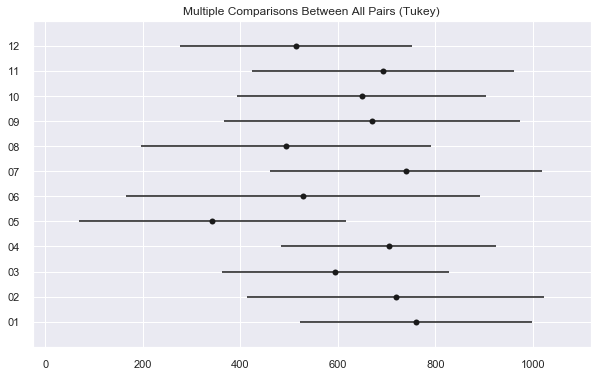

In [1962]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data.Revenue,     # Data
                          groups=data.OrderMonth,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary() 

As it shows in the reject column, non of those pairs are significantly different from each other in termes of mean revenue. However, you can see the small monthly flactuations from the plot.  

Another way of doing this tst is directly through the statsmodels.stats.multicomp library. This time we can see the plots showing the confedence level of each group individually. 

In [1963]:
import statsmodels.stats.multicomp
# for comparing the product categories, we use visualizations
posthoc = statsmodels.stats.multicomp.MultiComparison(data['Revenue'], data['Region'])
posthoc_results = mc.tukeyhsd()
print('\n', posthoc_results)


           Multiple Comparison of Means - Tukey HSD,FWER=0.05         
     group1          group2      meandiff   lower      upper   reject
---------------------------------------------------------------------
 British Isles  Central America -340.0324 -1051.0428  370.978  False 
 British Isles   Eastern Europe -146.6324 -1718.7355 1425.4707 False 
 British Isles   North America   136.1824 -288.9328   561.2976 False 
 British Isles  Northern Europe  -20.853   -645.265   603.559  False 
 British Isles    Scandinavia    -63.6239 -753.0367   625.7889 False 
 British Isles   South America   56.4718  -400.2927   513.2363 False 
 British Isles  Southern Europe  -148.851  -819.198   521.4961 False 
 British Isles   Western Europe  225.2987 -159.5211   610.1184 False 
Central America  Eastern Europe   193.4   -1465.6242 1852.4242 False 
Central America  North America   476.2148 -203.1792  1155.6087 False 
Central America Northern Europe  319.1794 -499.8099  1138.1688 False 
Central America   

In [1964]:
regions=data.Region.unique()

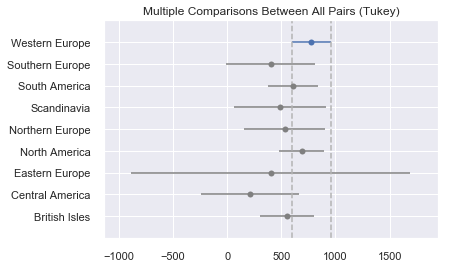

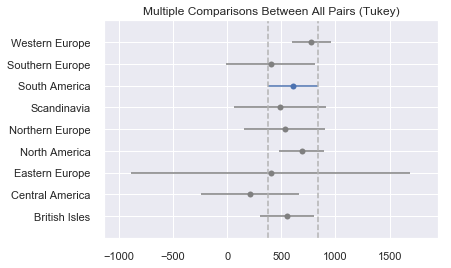

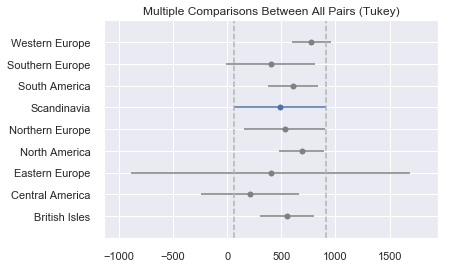

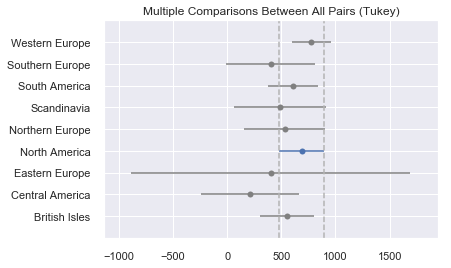

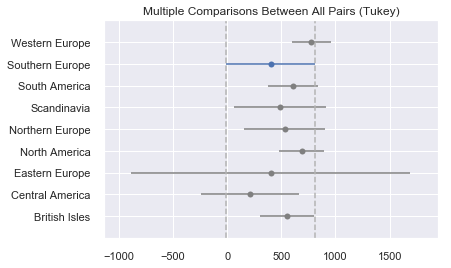

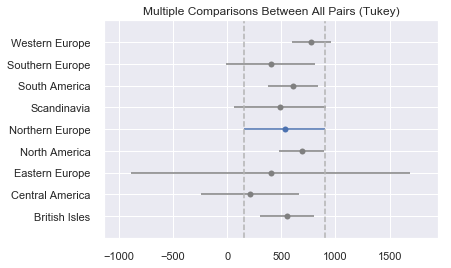

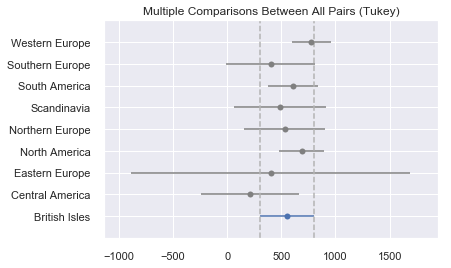

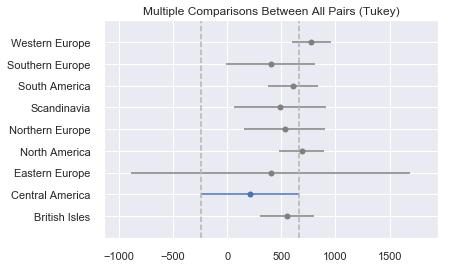

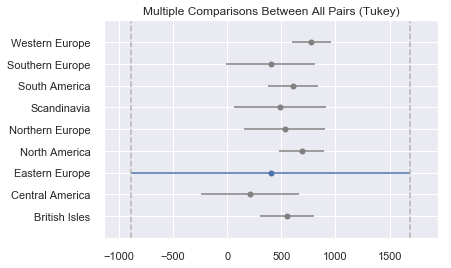

In [1965]:
for i in regions:
    posthoc_results.plot_simultaneous(comparison_name=i, figsize=(6,4));

In [1895]:
#data[data['Region']=="Eastern Europe"]

In [1896]:
data12= data.groupby('Region').sum()
data12

,Revenue,Quantity
Region,,
British Isles,23168.560,1066
Central America,2539.200,124
Eastern Europe,810.000,45
North America,47459.220,1940
Northern Europe,9023.250,304
Scandinavia,6344.110,257
South America,29797.105,1033
Southern Europe,5638.940,202
Western Europe,102554.900,3785


In [1897]:
data12.Revenue/data12.Quantity

Region
British Isles      21.734109
Central America    20.477419
Eastern Europe     18.000000
North America      24.463515
Northern Europe    29.681743
Scandinavia        24.685253
South America      28.845213
Southern Europe    27.915545
Western Europe     27.095086
dtype: float64

### 4.5 - Conclusion

According to ANOVA tests result, we fail to reject the null hypothesis. So, neither region nor the time of the year does not effect the average revanue from dairy product significantly. 

* That would mean Cheese is a timeless product. It can be sold anywhere and anytime. 
* The company can invest on advertising so that it attracts more customer without worrying about the season and location. 
* Western Europe region had the most number of orders and the largest revenue.   
* Eastern Europe region are lowest on cheese sale.
* Averadly the largest volume of cheese sale happens in January 

### 4.6 - Further Research

* The reason for Eastern Europe having low orders should be investigated. 


# Conclusions for all 4 tests

 * I have run the two sample Welch's t-test to investigate discount effects on quantity and another Welch's t-test on the profit. All discount levels increase the sale amount. However, since the price drops with the discounts, at some levels, discount does not help for overall profit to increase.  For 10%, 15% and 20% discounts, the sale amount increases but the new sale amount does not compromise the decreased price. So the company makes less money then the average profit on those sales with no discount. **Simply put, if no discount would have applied, company would sale less product but make more money on 10%, 15% and 20% discounts. According to this data, I would suggest stick with the 5% and 25% discounts. 5% discount exceptionally works well for making more sale and more profit.** 
 

 * Three different generations are working together at Northwind Company. Majority of the sale force population are millennials who are  in between 22-37 years old.  There are employees from Gen X and Gen Z as well. According to the result of one-way ANOVA test, there is no significant difference between  performances of different generations in the company.  **Employees from all ages would perform almost equally in terms of sales.** We can confidently say that companies sales policy and trainings are working across the generations in the company. That is good news. **We also observe experienced employees perform slightly better than the less experienced ones.  I would suggest mentorship among the employees to support the young ones to catch up with the others.**

* Company sells cheese in 8 regions year round. I have run two-way ANOVA test to see if there is any difference of the cheese sale in between regions.  Also tested the months of the year if there is any significant increase or decrease on the sales. Also tested if there is any best combination of the time of the year and the region. **Test results suggest that no significant difference between any of the region nor time of the year for cheese sales. However, largest volume of the cheese sale happens in the Western Europe and overall cheese sales are highest in the month of  April .  I would advertise and kick-off the sale of the new line of cheese in Januaryin Western Europe region.** 
